In [10]:
# 1. 사용할 패키지 불러오기
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Flatten, Dense, Dropout, Activation
import matplotlib.pyplot as plt
import numpy as np

# 2. 데이터셋 생성하기
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, 784).astype('float32') / 255.0
x_test = x_test.reshape(10000, 784).astype('float32') / 255.0
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [24]:
# 3. 모델 구성하기
model = Sequential()
model.add(Dense(units=64, activation='relu', input_dim=28*28)) # input_dim=28*28, 
#model.add(Dense(units=32, activation='relu'))
#model.add(Dropout(0.2))
model.add(Dense(units=10, activation='softmax'))

model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 64)                50240     
                                                                 
 dense_25 (Dense)            (None, 10)                650       
                                                                 
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


In [25]:
# 4. 모델 학습과정 설정하기
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# 5. 모델 학습시키기
hist = model.fit(x_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6983 - accuracy: 0.8188
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3559 - accuracy: 0.9005
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3079 - accuracy: 0.9125
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2782 - accuracy: 0.9214
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2552 - accuracy: 0.9283
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2366 - accuracy: 0.9334
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2205 - accuracy: 0.9380
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2069 - accuracy: 0.9420
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1949 - accuracy: 0.9449
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.184

range(1, 11)


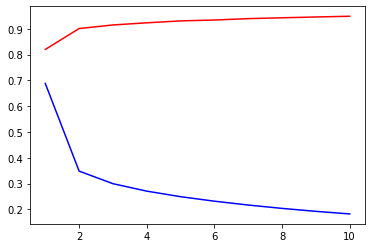

313/313 [==============================] - 1s 1ms/step - loss: 0.1770 - accuracy: 0.9488
## evaluation loss and_metrics ##
[0.1769866794347763, 0.9488000273704529]


In [4]:
# 6. 학습과정 살펴보기
acc = hist.history['accuracy']
#val_acc = hist.history['val_accuracy']
loss = hist.history['loss']
#val_loss = hist.history['val_loss']
 
epochs = range(1, len(acc) + 1)
print(epochs)

# ‘bo’는 파란색 점을 의미
plt.plot(epochs, loss, 'b', label='Training loss')
#plt.plot(epochs, val_acc, 'ro', label='Validation Accuracy')
# ‘b’는 파란색 실선을 의미
#plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.plot(epochs, acc, 'r', label='Accuracy')
#plt.title('Training and validation loss')
#plt.xlabel('Epochs')
#plt.ylabel('Loss/Accuracy')
#plt.legend()

plt.show()

# 7. 모델 평가하기
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=32)
print('## evaluation loss and_metrics ##')
print(loss_and_metrics)

## Answer of Test No. 9755 is 5 ##
[0.209 0.    0.001 0.001 0.002 0.605 0.    0.001 0.174 0.007]


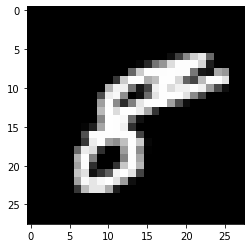

In [5]:
# 8. 모델 사용하기
# i = np.random.randint(0, len(x_test)-1)
i=9755
x_in = x_test[i:i+1]
plt.imshow(x_in.reshape(28, 28), cmap='gray')
y_out = model.predict(x_in)
print('## Answer of Test No. %d is %d ##' % (i, np.argmax(y_out)))
print(y_out[0].round(3))
